# XGBOOST Para regresión

## Preprocesado del dataset

### Importamos el dataset

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [37]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [38]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [39]:
california_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [40]:
res = california_housing.frame[california_housing.frame < 1 ].count()

# Display result
print("Result:\n",res)

Result:
 MedInc           155
HouseAge           0
AveRooms           2
AveBedrms       4395
Population         0
AveOccup           3
Latitude           0
Longitude      20640
MedHouseVal     3596
dtype: int64


Antes de continuar, me he dado cuenta de que al estar el valor medio de las casas, representado en cientos de miles de dolares, cuando le paso la función logaritmo para normalizar, los valores que están entre 0 y 1 se vuelven negativos, y esto no es deseable a la hora de realizar predicciones sobre los valores que nos devuelve el modelo, ni al pasar los datos por el modelo, asi que para solucionarlo voy a multiplicar la columna 'MedHouseVal' por 10, así los valores entre 0 y 1 pasarán a estar entre 1 y 10, y no supondrán un problema.

Esto también es aplicable a las columnas MedInc, AveRooms, AveBedrms,  y AveOccup, ya que son medias de valores, así que también aplicaremos este arreglo a esas columnas

In [41]:
california_housing.frame['MedInc'] = 10*(california_housing.frame['MedInc'])
california_housing.frame['AveRooms'] = 10*(california_housing.frame['AveRooms'])
california_housing.frame['AveBedrms'] = 10*(california_housing.frame['AveBedrms'])
california_housing.frame['AveOccup'] = 10*(california_housing.frame['AveOccup'])
california_housing.frame['MedHouseVal'] = 10*(california_housing.frame['MedHouseVal'])

### Manejo de datos missing

In [42]:
california_housing.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

No tenemos ningun dato null en el dataset, por lo que no es necesario ningun tipo de manejo de datos missing

### Manejo de datos categóricos

En este caso, nuestro dataset no contiene datos categóricos, asi que no aplica su manejo

### Estandarización y normalización de datos

Estandarizacion

In [43]:
california_df = california_housing.frame

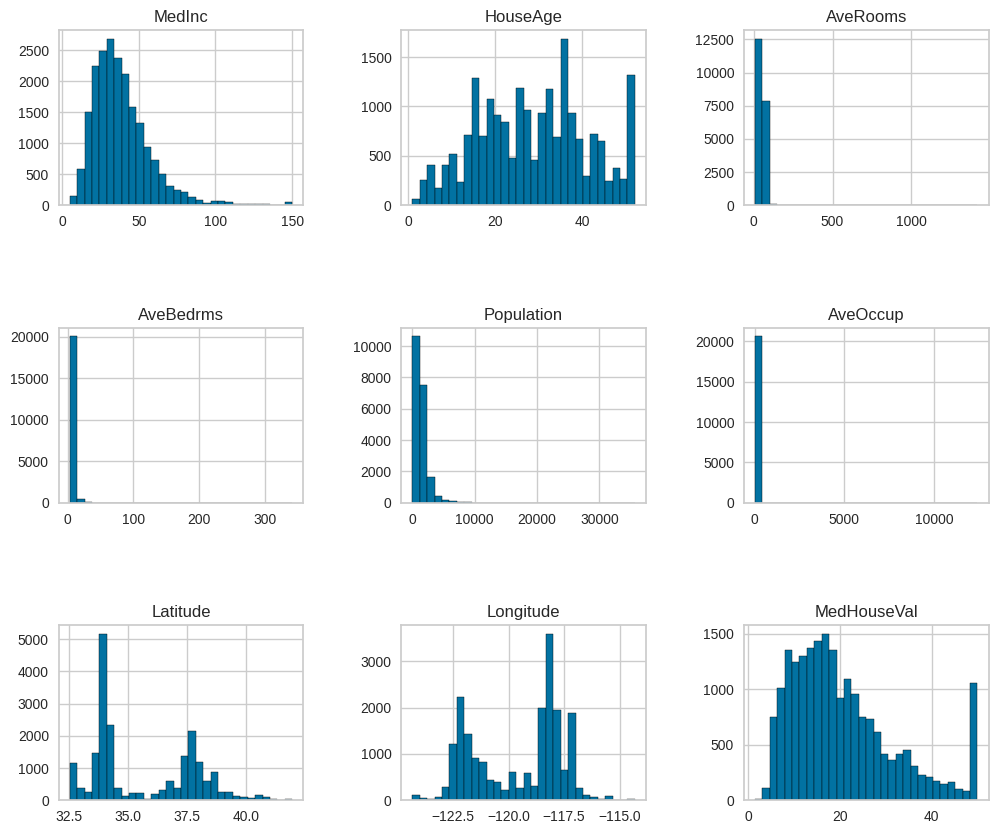

In [44]:
california_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Realizamos las transformaciones que mejoran la skewness y kurtosis de nuestros datos

In [45]:
california_df['MedInc'] = np.log(california_df['MedInc'])
california_df['AveBedrms'] = np.log(california_df['AveBedrms'])
california_df['Population'] = np.log(california_df['Population'])
california_df['AveRooms'] = np.log(california_df['AveRooms'])
california_df['AveOccup'] = np.log(california_df['AveOccup'])
california_df['MedHouseVal'] = np.log(california_df['MedHouseVal'])

In [46]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.421872,41.0,4.246225,2.326116,5.774552,3.240855,37.88,-122.23,3.812424
1,4.419009,21.0,4.133267,2.274063,7.783641,3.049198,37.86,-122.22,3.579344
2,4.284607,52.0,4.417410,2.373459,6.206576,3.333011,37.85,-122.24,3.561330
3,4.033019,52.0,4.063430,2.373099,6.324359,3.237872,37.85,-122.25,3.530177
4,3.649671,52.0,4.140250,2.380547,6.336826,3.082583,37.85,-122.25,3.532810
...,...,...,...,...,...,...,...,...,...
20635,2.747463,25.0,3.921073,2.427748,6.739337,3.242829,39.48,-121.09,2.055405
20636,3.241342,18.0,4.113172,2.577022,5.874931,3.441317,39.49,-121.21,2.042518
20637,2.833213,17.0,3.952309,2.415996,6.914731,3.146578,39.43,-121.22,2.222459
20638,2.927025,18.0,3.975845,2.461228,6.608001,3.055514,39.43,-121.32,2.136531


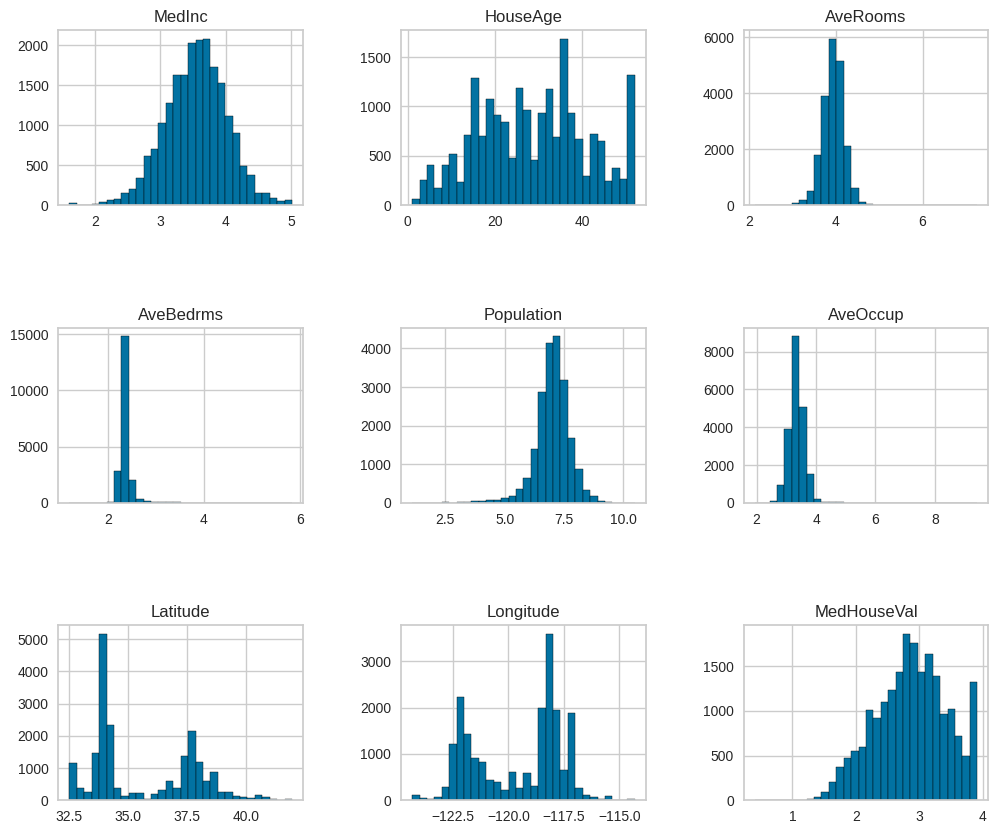

In [47]:
california_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### Separación en entrenamiento y test

In [48]:
california_no_target = california_df.drop(columns=['MedHouseVal'])

X = california_no_target.values

y = california_df['MedHouseVal']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[   3.92911608   37.            3.96671592 ...    3.26328058
    34.23       -118.25      ]
 [   4.24756624   22.            4.2460129  ...    3.18886689
    34.14       -118.82      ]
 [   3.58415762   37.            3.75255751 ...    3.52564071
    34.3        -118.43      ]
 ...
 [   3.46501689   31.            3.59490426 ...    2.88555384
    36.58       -121.9       ]
 [   4.03096093   34.            3.81564388 ...    3.11256519
    33.62       -117.93      ]
 [   2.63059304   15.            3.67110497 ...    3.53696341
    32.8        -115.56      ]]
[[   3.72612707   22.            4.03655173 ...    3.73303819
    32.58       -117.05      ]
 [   4.05691957   32.            4.11205777 ...    3.40816605
    33.92       -117.97      ]
 [   3.77246204   29.            4.0827293  ...    3.37077678
    38.65       -121.84      ]
 ...
 [   3.73239382   10.            4.06351598 ...    3.6384486
    34.03       -117.64      ]
 [   2.78012277   41.            3.57283522 ...    3.2470467

### Normalización

Normalizamos utilizando StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler
scaler_simple = StandardScaler()
X_train_scaled = scaler_simple.fit_transform(X_train)
X_test_scaled = scaler_simple.transform(X_test)

## Aplicación del modelo

In [51]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1, booster='gblinear')
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:squarederror', ...)

In [52]:
y_pred_xgb_regression = xgb_model.predict(X_test_scaled)

In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test, y_pred_xgb_regression)
print(np.sqrt(mse))

0.32775689226378557


## Comparación con nuestro antiguo modelo

In [54]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
regr_mult_train = LinearRegression()

# Train the model using the training sets
regr_mult_train.fit(X_train_scaled, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [55]:
# Make predictions using the testing set
y_pred_regression = regr_mult_train.predict(X_test_scaled)
print(y_pred_regression)
print(y_test)


[2.98420668 3.19796013 2.78177446 ... 2.73696485 2.58995119 2.50090618]
14740    2.616666
10101    3.183456
20566    2.999226
2670     1.981001
15709    3.828641
           ...   
11478    3.409496
5428     3.424263
13348    2.766948
166      2.841415
3342     2.143589
Name: MedHouseVal, Length: 6880, dtype: float64


In [56]:
import sklearn.metrics as metrics
# Make predictions using the testing set

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error

print("Mean squared error (Linear Regression): %.2f" %mean_squared_error(y_test, y_pred_regression))
print("Mean squared error (XGBOOST): %.2f" %mean_squared_error(y_test, y_pred_xgb_regression))
print(" ")
# Explained variance score: 1 is perfect prediction
print('Variance score (Linear Regression): %.5f' %r2_score(y_test, y_pred_regression))
print('Variance score (XGBOOST): %.5f' %r2_score(y_test, y_pred_xgb_regression))
print(" ")
#R2
print('Coefficient of determination  (Linear Regression) (R2): %.2f' % metrics.r2_score(y_test, y_pred_regression))
print('Coefficient of determination  (XGBOOST) (R2): %.2f' % metrics.r2_score(y_test, y_pred_xgb_regression))


Mean squared error (Linear Regression): 0.11
Mean squared error (XGBOOST): 0.11
 
Variance score (Linear Regression): 0.66995
Variance score (XGBOOST): 0.66997
 
Coefficient of determination  (Linear Regression) (R2): 0.67
Coefficient of determination  (XGBOOST) (R2): 0.67


Observamos que los resultados son extremadamente parecidos para nuestro modelo de regresión lineal, y XGBOOST.

# XGBOOST Para clasificación

## Preprocesado del dataset

### Importamos el dataset

In [59]:
heart=pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Manejo de datos missing

In [60]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Como podemos observar, de forma natural no hay valores missings en nuestro dataset.

### Manejo de datos categóricos



En el caso de mi dataset, las variables categóricas ya vienen codificadas en valores numéricos, sin embargo, voy a volver a codificarlas como categóricas, para demostrar cuál sería el proceso a seguir.

El primer paso a seguir es identificar las variables categóricas, las cuales son:


*   Sex
*   cp
* rest_ecg
* thall

Vamos a aprovechar, que con las variables cp y rest_ecg, es correcto utilizar la codificación one-hot, para demostrar cuál sería el proceso a seguir, en caso de tener que codificar variables categóricas como numéricas:



In [61]:
heart_categoricas = heart.copy()

heart_categoricas['cp'].replace([0, 1, 2, 3],
                        ['típica', 'atípica', 'no_anginal', 'asintomático'], inplace=True)
heart_categoricas['restecg'].replace([0, 1, 2],
                        ['normal', 'anormalidades_patron_onda_ST-T', 'hipertrofia_ventricular_izquierda'], inplace=True)
heart_categoricas['slp'].replace([0, 1, 2],
                        ['auge', 'plana', 'declive'], inplace=True)
heart_categoricas['thall'].replace([1, 2, 3],
                        ['defecto_arreglado', 'normal', 'defecto_reversible'], inplace=True)
heart_categoricas.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,asintomático,145,233,1,normal,150,0,2.3,auge,0,defecto_arreglado,1
1,37,1,no_anginal,130,250,0,anormalidades_patron_onda_ST-T,187,0,3.5,auge,0,normal,1
2,41,0,atípica,130,204,0,normal,172,0,1.4,declive,0,normal,1
3,56,1,atípica,120,236,0,anormalidades_patron_onda_ST-T,178,0,0.8,declive,0,normal,1
4,57,0,típica,120,354,0,anormalidades_patron_onda_ST-T,163,1,0.6,declive,0,normal,1


A continuación, conseguimos los dummies de las variables

In [62]:
dummy_cp = pd.get_dummies(heart_categoricas["cp"], prefix="cp")
dummy_restecg = pd.get_dummies(heart_categoricas["restecg"], prefix="restecg")
dummy_slp = pd.get_dummies(heart_categoricas["slp"], prefix="slp_pendiente")
dummy_thall = pd.get_dummies(heart_categoricas["thall"], prefix="thall")

Este es el ejemplo de como quedaría una de nuestras variables, con codifcación one hot

In [63]:
dummy_cp.head(10)

,cp_asintomático,cp_atípica,cp_no_anginal,cp_típica
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
5,0,0,0,1
6,0,1,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,1,0


Una vez hecho eso, eliminamos de nuestro dataframe original las columnas correspondientes a esas variables, las reemplazamos por el dataframe que hemos creado con la codifiación one-hot ya realizada

In [64]:
heart_categoricas = heart_categoricas.drop(['cp'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_cp], axis = 1)
heart_categoricas = heart_categoricas.drop(['restecg'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_restecg], axis = 1)
heart_categoricas = heart_categoricas.drop(['slp'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_slp], axis = 1)
heart_categoricas = heart_categoricas.drop(['thall'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_thall], axis = 1)

In [65]:
heart_categoricas.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,restecg_anormalidades_patron_onda_ST-T,restecg_hipertrofia_ventricular_izquierda,restecg_normal,slp_pendiente_auge,slp_pendiente_declive,slp_pendiente_plana,thall_0,thall_defecto_arreglado,thall_defecto_reversible,thall_normal
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,1,0,0,0,0,0,1
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,1,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,1,0,0,0,1,0,0,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,...,1,0,0,0,1,0,0,0,0,1


### Estandarización y normalización de los datos

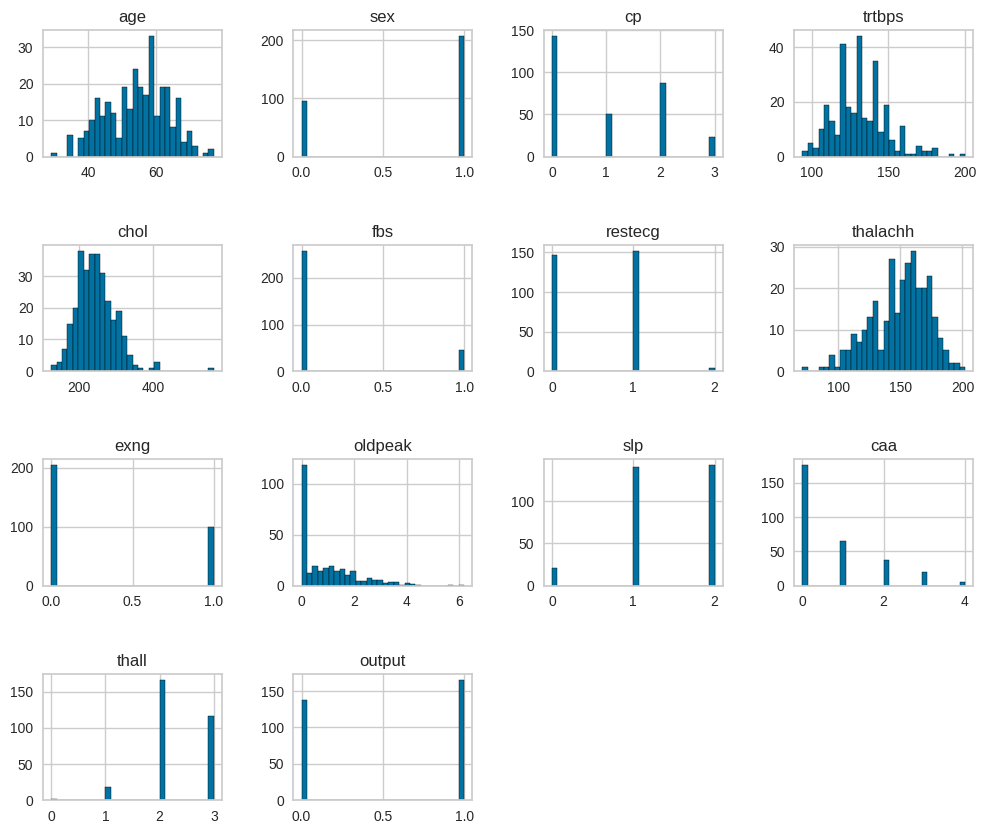

In [66]:
heart.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [67]:
heart_categoricas['chol'] = np.log(heart_categoricas['chol'])
heart_categoricas['trtbps'] = np.log(heart_categoricas['trtbps'])

Como ya hemos pasado por este proceso en anteriores trabajos con el mismo dataset, vamos a pasar directamente a hacer las transformaciones necesarias para mejorar la skewness y kurtosis de nuestras distintas variables

### Separación en entrenamiento y test

In [68]:
heart_no_target = heart_categoricas.drop(columns=['output'])

X = heart_no_target.values

y = heart_categoricas['output']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[63.          0.          4.90527478 ...  0.          0.
   1.        ]
 [70.          1.          4.86753445 ...  0.          0.
   1.        ]
 [43.          1.          5.01063529 ...  0.          0.
   1.        ]
 ...
 [56.          1.          4.78749174 ...  0.          1.
   0.        ]
 [47.          1.          4.92725369 ...  0.          0.
   1.        ]
 [58.          1.          4.78749174 ...  0.          0.
   1.        ]]
[[70.          1.          4.97673374 ...  0.          1.
   0.        ]
 [64.          1.          5.13579844 ...  0.          1.
   0.        ]
 [59.          1.          5.13579844 ...  0.          1.
   0.        ]
 ...
 [47.          1.          4.86753445 ...  0.          0.
   1.        ]
 [59.          1.          5.09986643 ...  1.          0.
   0.        ]
 [62.          0.          4.92725369 ...  0.          0.
   1.        ]]
54     1
234    0
18     1
205    0
254    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: output,

### Normalización

Normalizamos utilizando StandardScaler

In [70]:
from sklearn.preprocessing import StandardScaler
scaler_simple = StandardScaler()
X_train_scaled = scaler_simple.fit_transform(X_train)
X_test_scaled = scaler_simple.transform(X_test)

## Aplicación del modelo

In [71]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1)
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [72]:
from copy import deepcopy
xgb_model_binary = deepcopy(xgb_model)

In [73]:
y_pred_xgb_classifier = xgb_model.predict(X_test_scaled)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, y_pred_xgb_classifier))
print(classification_report(y_test, y_pred_xgb_classifier, digits=4))
print(accuracy_score(y_test, y_pred_xgb_classifier))

[[38 11]
 [ 8 44]]
              precision    recall  f1-score   support

           0     0.8261    0.7755    0.8000        49
           1     0.8000    0.8462    0.8224        52

    accuracy                         0.8119       101
   macro avg     0.8130    0.8108    0.8112       101
weighted avg     0.8127    0.8119    0.8115       101

0.8118811881188119


## Comparación con nuestro antiguo modelo

In [95]:
# Create a SVC object
from sklearn.svm import SVC
classifierSVC = SVC(kernel = "rbf", probability=True, random_state = 0, C =1,  gamma = "auto")
classifierSVC.fit(X_train_scaled, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [76]:
y_pred_SVC  = classifierSVC.predict(X_test_scaled)
print(y_pred_SVC)
print(y_test)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0]
225    0
152    1
228    0
201    0
52     1
      ..
247    0
288    0
156    1
297    0
252    0
Name: output, Length: 101, dtype: int64


## Comparación con matriz de confusión

In [77]:
# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX.  (Support Vector Machine SVC): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")
print("CONF. MATRX.  (XGBOOST Classifier): ")
print( confusion_matrix(y_test, y_pred_xgb_classifier) )
print(" ")



# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Support Vector Machine SVC): %.2f" % accuracy_score(y_test, y_pred_SVC) )
print("   ACC (XGBOOST Classifier): %.2f" % accuracy_score(y_test, y_pred_xgb_classifier) )

print("CLSS_REPORT (Support Vector Machine SVC): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")
print("CLSS_REPORT (XGBOOST Classifier): ")
print( classification_report(y_test, y_pred_xgb_classifier) )
print(" ")


CONFUSION MATRIX
CONF. MATRX.  (Support Vector Machine SVC): 
[[38 11]
 [ 7 45]]
 
CONF. MATRX.  (XGBOOST Classifier): 
[[38 11]
 [ 8 44]]
 
CLASSIFICATION_REPORT
ACCURACY
   ACC (Support Vector Machine SVC): 0.82
   ACC (XGBOOST Classifier): 0.81
CLSS_REPORT (Support Vector Machine SVC): 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.80      0.87      0.83        52

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101

 
CLSS_REPORT (XGBOOST Classifier): 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        49
           1       0.80      0.85      0.82        52

    accuracy                           0.81       101
   macro avg       0.81      0.81      0.81       101
weighted avg       0.81      0.81      0.81       101

 


## Comparación con curva ROC

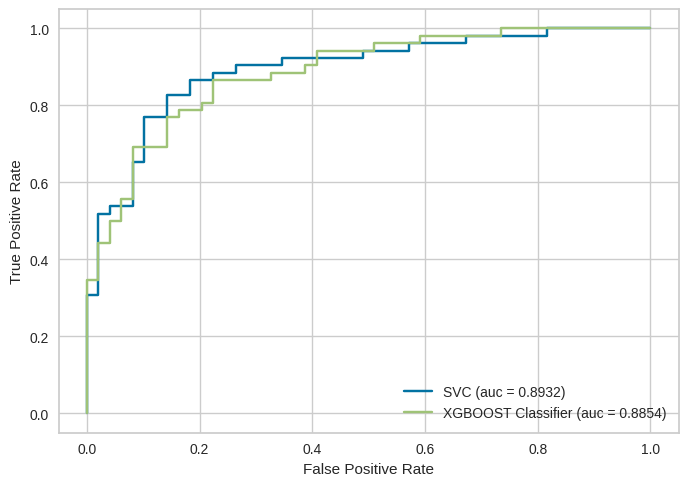

In [78]:
from sklearn.metrics import roc_curve, auc

#Máquina de soporte vectorial
y_prob_SVC  = classifierSVC.predict_proba(X_test_scaled)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_prob_SVC[:, 1])
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='SVC (auc = %0.4f)' % auc_SVC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#XGBOOST Classifier
y_prob_SVC_sin_correlacionadas   = xgb_model.predict_proba(X_test_scaled)
SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas, threshold_sin_correlacionadas = roc_curve(y_test, y_prob_SVC_sin_correlacionadas[:, 1])
auc_SVC_sin_correlacionadas = auc(SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas)
plt.plot(SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas, linestyle='-', label='XGBOOST Classifier (auc = %0.4f)' % auc_SVC_sin_correlacionadas)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend()

plt.show()

Observamos que tanto en matriz de confusión como en curva ROC, obtenemos peores resultados con el modelo XGBOOST que con la máquina de soporte vectorial, que había elegido en anteriores trabajos.

# PyCaret

## Instalación

In [79]:
!pip install pycaret

In [80]:
from pycaret.classification import *
from pycaret.datasets import get_data


!pip install pyyaml==5.4.1


  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


## Elegimos y aplicamos el modelo

In [81]:
exp_clf = setup(heart_categoricas, target='output')

,Description,Value
0,Session id,7301
1,Target,output
2,Target type,Binary
3,Original data shape,"(303, 24)"
4,Transformed data shape,"(303, 24)"
5,Transformed train set shape,"(212, 24)"
6,Transformed test set shape,"(91, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [82]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [83]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8299,0.9155,0.8985,0.8260,0.8542,0.6537,0.6722,0.8720
nb,Naive Bayes,0.8158,0.8627,0.8455,0.8387,0.8338,0.6283,0.6453,0.0420
ridge,Ridge Classifier,0.8158,0.0000,0.8720,0.8224,0.8392,0.6261,0.6443,0.0400
rf,Random Forest Classifier,0.8065,0.8986,0.8311,0.8309,0.8225,0.6118,0.6272,0.2880
lda,Linear Discriminant Analysis,0.8063,0.9065,0.8636,0.8126,0.8310,0.6067,0.6230,0.0430
ada,Ada Boost Classifier,0.8011,0.8617,0.8189,0.8305,0.8152,0.6015,0.6188,0.1420
gbc,Gradient Boosting Classifier,0.7786,0.8577,0.7864,0.8160,0.7893,0.5583,0.5743,0.1640
et,Extra Trees Classifier,0.7781,0.8667,0.7773,0.8220,0.7907,0.5570,0.5720,0.1850
lightgbm,Light Gradient Boosting Machine,0.7781,0.8576,0.8220,0.8053,0.7966,0.5543,0.5787,0.3820
xgboost,Extreme Gradient Boosting,0.7734,0.8686,0.7955,0.8024,0.7907,0.5463,0.5573,0.0920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7301, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
logisticregression = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.9583,0.8333,0.9091,0.8696,0.7273,0.7303
1,0.8636,0.9583,0.8333,0.9091,0.8696,0.7273,0.7303
2,0.9048,0.9636,1.0000,0.8462,0.9167,0.8073,0.8228
3,0.7143,0.8273,0.9091,0.6667,0.7692,0.4167,0.4523
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8095,0.9182,0.9091,0.7692,0.8333,0.6147,0.6264
6,0.7143,0.9000,1.0000,0.6471,0.7857,0.4112,0.5087
7,0.8571,0.9167,0.8333,0.9091,0.8696,0.7123,0.7156
8,0.8095,0.8704,0.9167,0.7857,0.8462,0.6000,0.6124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Comparación de resultados

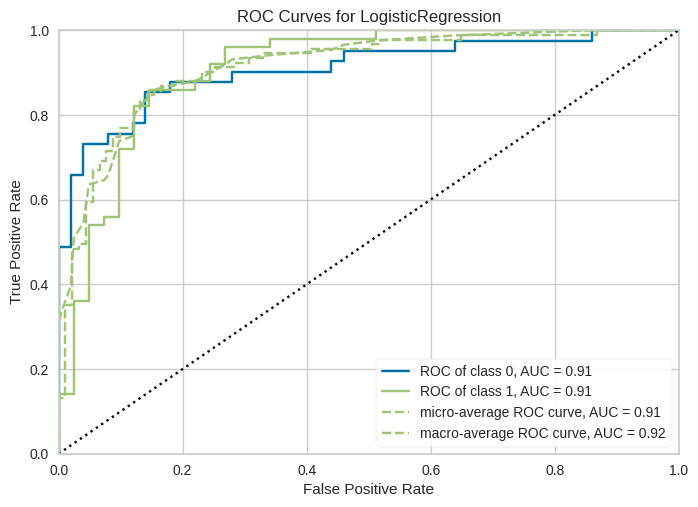

In [85]:
plot_model(logisticregression)

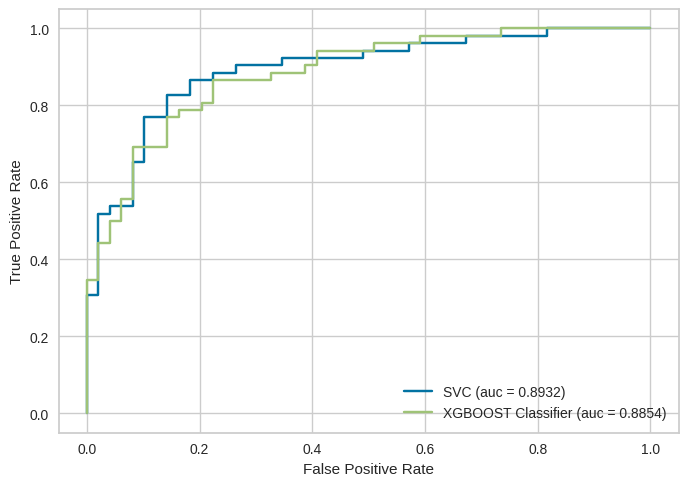

In [86]:
from sklearn.metrics import roc_curve, auc

#Máquina de soporte vectorial
y_prob_SVC  = classifierSVC.predict_proba(X_test_scaled)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_prob_SVC[:, 1])
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='SVC (auc = %0.4f)' % auc_SVC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#XGBOOST Classifier
y_prob_SVC_sin_correlacionadas   = xgb_model.predict_proba(X_test_scaled)
SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas, threshold_sin_correlacionadas = roc_curve(y_test, y_prob_SVC_sin_correlacionadas[:, 1])
auc_SVC_sin_correlacionadas = auc(SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas)
plt.plot(SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas, linestyle='-', label='XGBOOST Classifier (auc = %0.4f)' % auc_SVC_sin_correlacionadas)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend()

plt.show()

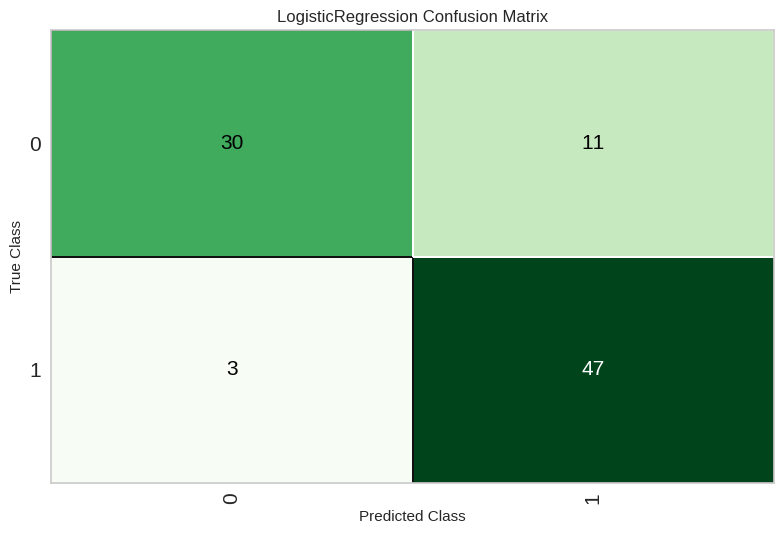

In [87]:
plot_model(logisticregression, 'confusion_matrix')

In [88]:
# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX.  (Support Vector Machine SVC): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")
print("CONF. MATRX.  (XGBOOST Classifier): ")
print( confusion_matrix(y_test, y_pred_xgb_classifier) )
print(" ")


CONFUSION MATRIX
CONF. MATRX.  (Support Vector Machine SVC): 
[[38 11]
 [ 7 45]]
 
CONF. MATRX.  (XGBOOST Classifier): 
[[38 11]
 [ 8 44]]
 


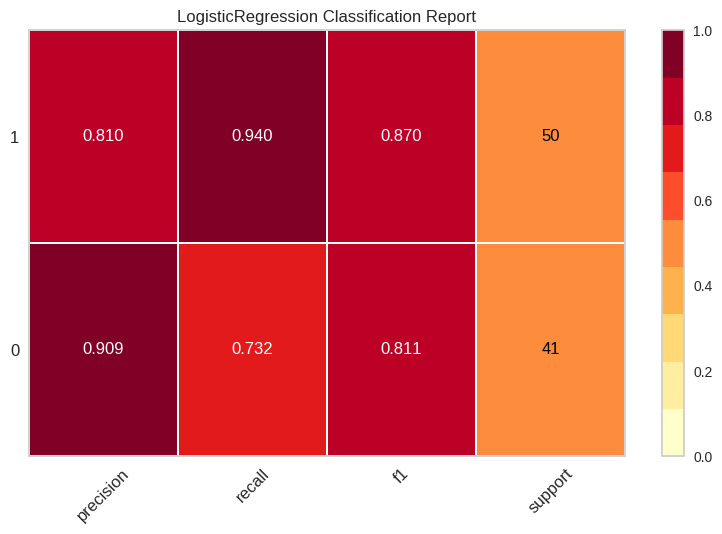

In [89]:
plot_model(logisticregression, 'class_report')

In [90]:
# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Support Vector Machine SVC): %.2f" % accuracy_score(y_test, y_pred_SVC) )
print("   ACC (XGBOOST Classifier): %.2f" % accuracy_score(y_test, y_pred_xgb_classifier) )

print("CLSS_REPORT (Support Vector Machine SVC): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")
print("CLSS_REPORT (XGBOOST Classifier): ")
print( classification_report(y_test, y_pred_xgb_classifier) )
print(" ")

CLASSIFICATION_REPORT
ACCURACY
   ACC (Support Vector Machine SVC): 0.82
   ACC (XGBOOST Classifier): 0.81
CLSS_REPORT (Support Vector Machine SVC): 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.80      0.87      0.83        52

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101

 
CLSS_REPORT (XGBOOST Classifier): 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        49
           1       0.80      0.85      0.82        52

    accuracy                           0.81       101
   macro avg       0.81      0.81      0.81       101
weighted avg       0.81      0.81      0.81       101

 


En este caso si hemos obtenido mejores resultados tanto en matriz de confusión, como en curva ROC, que la máquina de soporte vectorial que utilizamos originalmente, y el modelo XGBOOST.